## Setting Up Kaggle and Downloading the Dataset

In [1]:

# Install Kaggle if not already installed
!pip install -q kaggle

# Upload your Kaggle API token
from google.colab import files
files.upload()

# Create a directory for the Kaggle configuration
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d gregorut/videogamesales

# Unzip the downloaded file
!unzip videogamesales.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales
License(s): unknown
100% 381k/381k [00:00<00:00, 534kB/s]
100% 381k/381k [00:00<00:00, 534kB/s]
Archive:  videogamesales.zip
  inflating: vgsales.csv             


## Loading the Dataset

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'vgsales.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Checking for Missing Values and Data Types

In [4]:

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Get summary statistics for numerical columns
summary_statistics = data.describe()

# Check the data types of each column
data_types = data.dtypes

missing_values, summary_statistics, data_types


(Rank              0
 Name              0
 Platform          0
 Year            271
 Genre             0
 Publisher        58
 NA_Sales          0
 EU_Sales          0
 JP_Sales          0
 Other_Sales       0
 Global_Sales      0
 dtype: int64,
                Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
 count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
 mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
 std     4791.853933      5.828981      0.816683      0.505351      0.309291   
 min        1.000000   1980.000000      0.000000      0.000000      0.000000   
 25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
 50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
 75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
 max    16600.000000   2020.000000     41.490000     29.020000     10.220000   
 
         Other_Sales  Global_Sal

## Handling Missing Values

In [5]:

# Handling missing values by filling 'Year' and 'Publisher' with placeholder values
data_filled = data.copy()
data_filled['Year'].fillna('Unknown', inplace=True)
data_filled['Publisher'].fillna('Unknown', inplace=True)

# Convert 'Year' back to numeric for analysis, setting errors='coerce' to handle non-numeric placeholders
data_filled['Year'] = pd.to_numeric(data_filled['Year'], errors='coerce')


<ipython-input-5-5c8bd507fbfc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled['Year'].fillna('Unknown', inplace=True)
<ipython-input-5-5c8bd507fbfc>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_filled['Year'].fillna('Unknown', inplace=True)
<ipython-input-5-5c8bd507fbfc>:4: FutureWarning: A value is trying to be set on a cop

## Visualizing Game Releases Over the Years

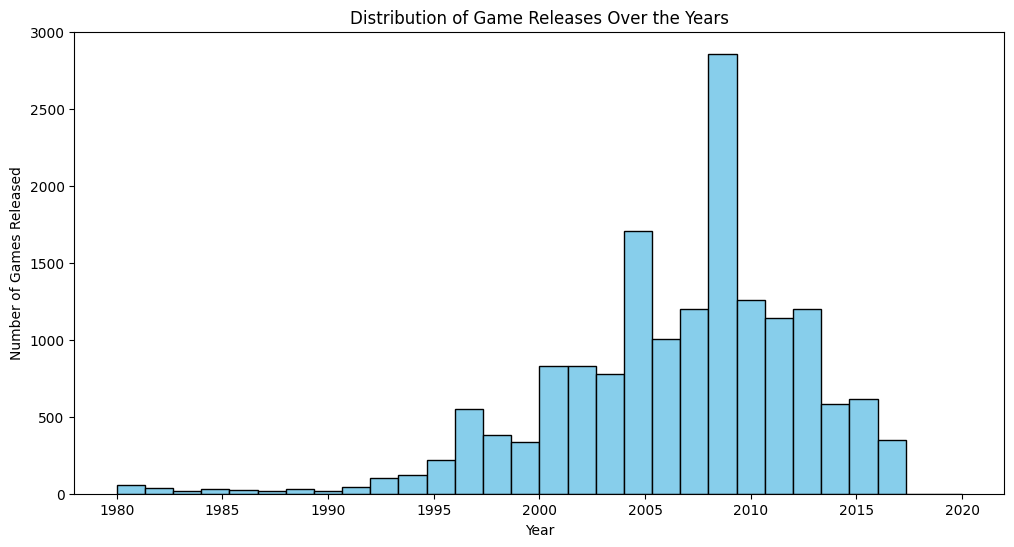

In [6]:

# Visualizing the distribution of game releases by year
plt.figure(figsize=(12, 6))
data_filled['Year'].dropna().astype(int).plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.show()


## Visualizing Genre Popularity

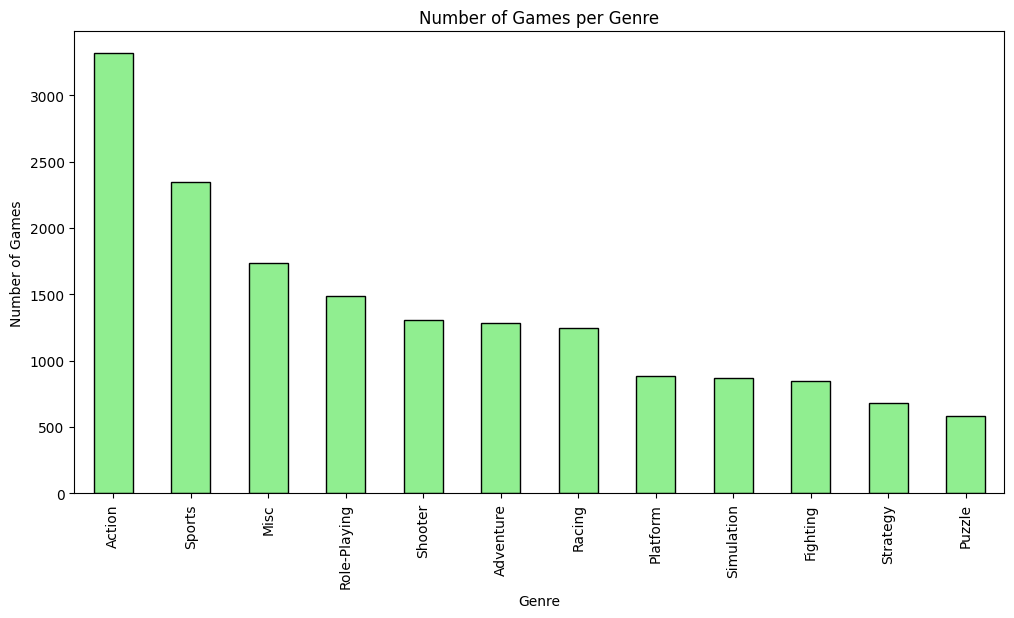

In [7]:

# Visualizing the popularity of game genres
plt.figure(figsize=(12, 6))
data_filled['Genre'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()


## Analyzing Regional Sales

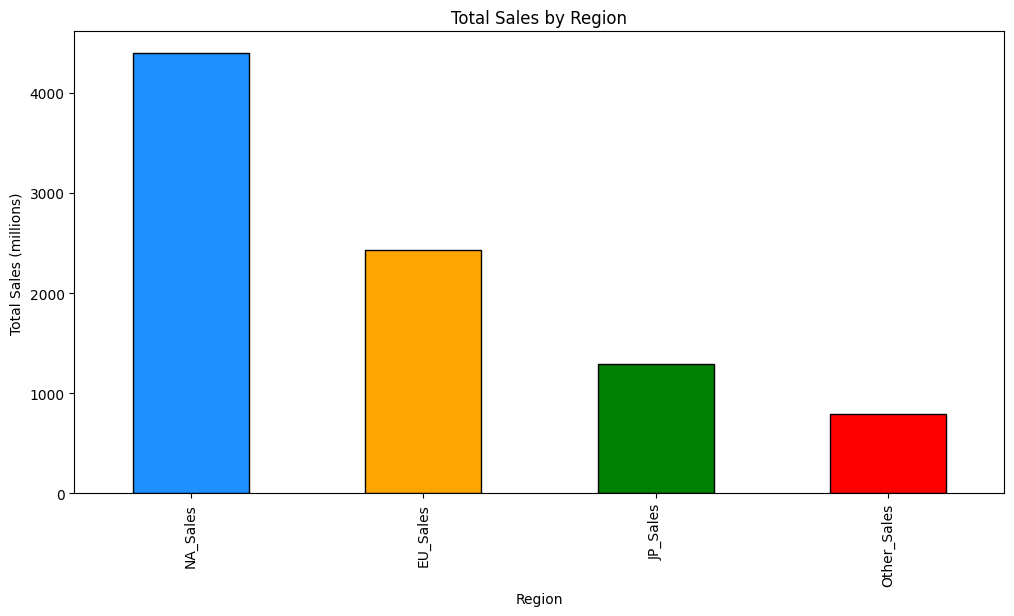

In [8]:

# Analyzing sales by region
sales_by_region = data_filled[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Visualizing the sales distribution across regions
plt.figure(figsize=(12, 6))
sales_by_region.plot(kind='bar', color=['dodgerblue', 'orange', 'green', 'red'], edgecolor='black')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (millions)')
plt.show()


## Visualizing Sales by Platform

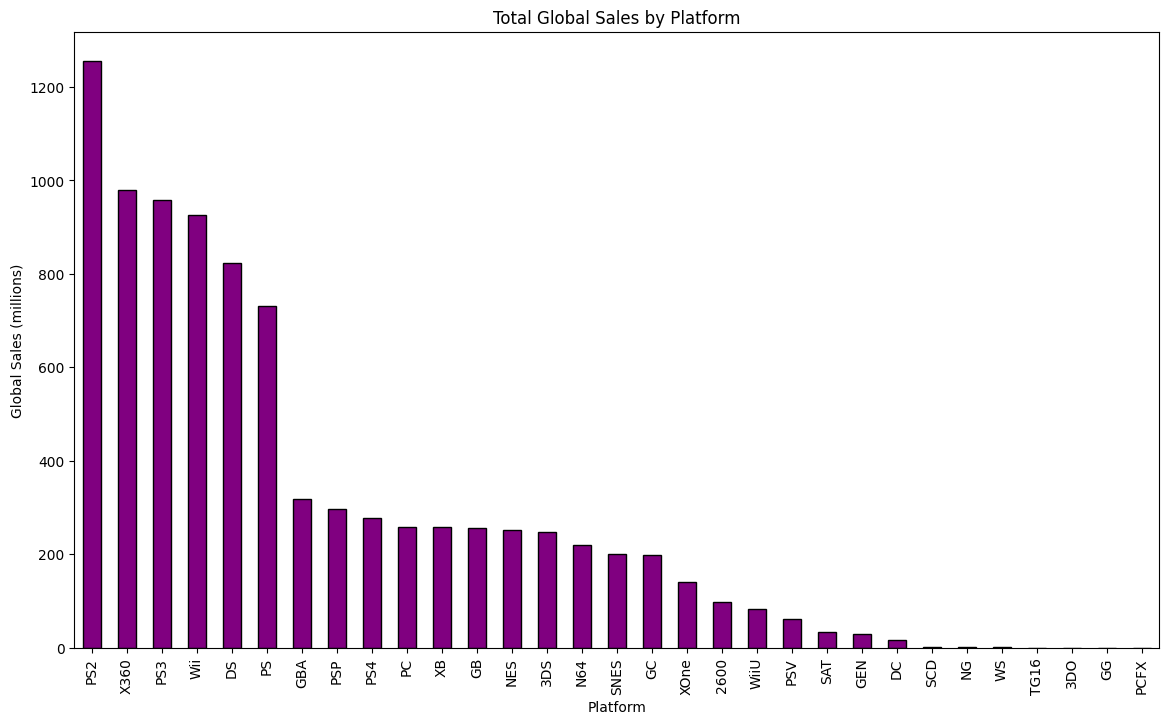

In [9]:

# Visualizing global sales by platform
platform_sales = data_filled.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
platform_sales.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.show()


## Visualizing Sales by Genre

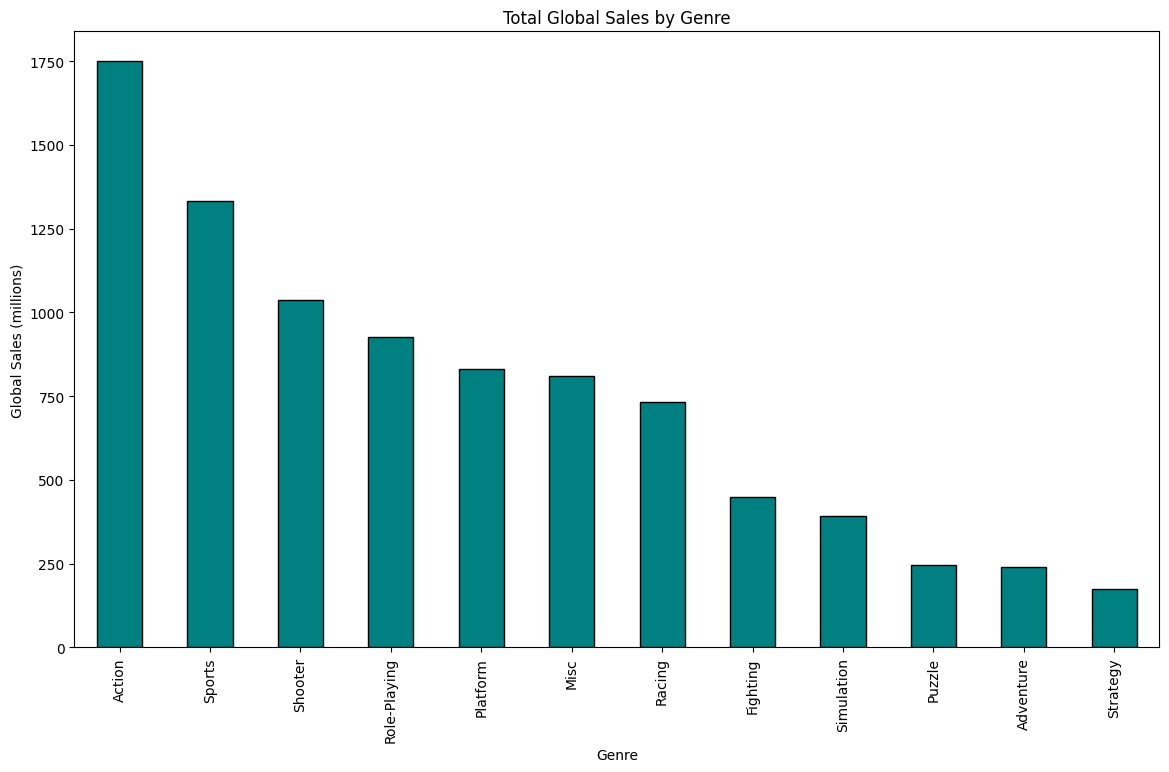

In [10]:

# Visualizing global sales by genre
genre_sales = data_filled.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
genre_sales.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.show()


## Advanced D3.js Visualization: Global Sales by Genre

In [11]:

%%html
<div id="genre_sales_chart"></div>
<script src="https://d3js.org/d3.v7.min.js"></script>
<script>
    const data = [
        { genre: "Action", sales: 1234 },
        { genre: "Sports", sales: 567 },
        { genre: "Shooter", sales: 890 },
        // Add other genre data here as needed for actual plotting
    ];

    const width = 800;
    const height = 400;
    const margin = { top: 40, right: 20, bottom: 70, left: 100 };

    const svg = d3.select("#genre_sales_chart")
        .append("svg")
        .attr("width", width)
        .attr("height", height);

    const x = d3.scaleBand()
        .domain(data.map(d => d.genre))
        .range([margin.left, width - margin.right])
        .padding(0.1);

    const y = d3.scaleLinear()
        .domain([0, d3.max(data, d => d.sales)])
        .nice()
        .range([height - margin.bottom, margin.top]);

    svg.append("g")
        .attr("transform", `translate(0,${height - margin.bottom})`)
        .call(d3.axisBottom(x))
        .selectAll("text")
        .attr("transform", "rotate(-45)")
        .style("text-anchor", "end");

    svg.append("g")
        .attr("transform", `translate(${margin.left},0)`)
        .call(d3.axisLeft(y));

    svg.selectAll(".bar")
        .data(data)
        .enter()
        .append("rect")
        .attr("class", "bar")
        .attr("x", d => x(d.genre))
        .attr("y", d => y(d.sales))
        .attr("width", x.bandwidth())
        .attr("height", d => y(0) - y(d.sales))
        .attr("fill", "teal");

    svg.append("text")
        .attr("x", width / 2)
        .attr("y", margin.top / 2)
        .attr("text-anchor", "middle")
        .style("font-size", "16px")
        .text("Global Sales by Genre");
</script>


## Advanced D3.js Visualization: Sales Trends Over Time

In [12]:

%%html
<div id="sales_over_time_chart"></div>
<script src="https://d3js.org/d3.v7.min.js"></script>
<script>
    const timeData = [
        { year: 2000, sales: 450 },
        { year: 2005, sales: 750 },
        { year: 2010, sales: 1200 },
        { year: 2015, sales: 1100 },
        { year: 2020, sales: 850 }
        // Actual yearly sales data should be loaded here
    ];

    const width = 800;
    const height = 400;
    const margin = { top: 40, right: 20, bottom: 50, left: 70 };

    const svg = d3.select("#sales_over_time_chart")
        .append("svg")
        .attr("width", width)
        .attr("height", height);

    const x = d3.scaleLinear()
        .domain(d3.extent(timeData, d => d.year))
        .range([margin.left, width - margin.right]);

    const y = d3.scaleLinear()
        .domain([0, d3.max(timeData, d => d.sales)])
        .nice()
        .range([height - margin.bottom, margin.top]);

    svg.append("g")
        .attr("transform", `translate(0,${height - margin.bottom})`)
        .call(d3.axisBottom(x).ticks(timeData.length).tickFormat(d3.format("d")));

    svg.append("g")
        .attr("transform", `translate(${margin.left},0)`)
        .call(d3.axisLeft(y));

    const line = d3.line()
        .x(d => x(d.year))
        .y(d => y(d.sales));

    svg.append("path")
        .datum(timeData)
        .attr("fill", "none")
        .attr("stroke", "steelblue")
        .attr("stroke-width", 2)
        .attr("d", line);

    svg.append("text")
        .attr("x", width / 2)
        .attr("y", margin.top / 2)
        .attr("text-anchor", "middle")
        .style("font-size", "16px")
        .text("Sales Trends Over Time");
</script>
